### Topics to be discussed.
- Mean, Median, Mode and their relationship ==> Skewed Right, symmetric, Skewed Left
- Range, verience, standard deviation
- Normal distribution and standard deviation (1 standard deviation of the mean- 68%, 2 standard deviation 95%, 3 standard deviation 99.7%...)
- Z-score (standard deviation 1, mean = 0, z-score= number of sd)
- Inter quatile range.
- Statistical testing (t-test, one way, two way)
- Correlation
- Hypotheis testing

<p style="float:right;">
<span>By- Darpan Kattel <a href="https://darpankattel.com.np/" target="_blank">(Website)</a></span>
<br />
    <span>PUL077BCT<b>099</b></span>
</p>

### Problem 1: Mean, Median, Mode
A retail company wants to analyze the sales data of its top-selling product over the past year to gain insights into customer purchasing behavior. The company has collected daily sales data for this product and wants to understand the central tendency of sales figures. By calculating the mean, median, and mode of the sales data, the company aims to identify patterns, understand typical sales volumes, and detect any skewness or anomalies in the sales distribution. Generate the daily sales data for a year by yourself. Analyze the result.
- use daily_sales.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../csv-files/daily_sales.csv")

In [4]:
df.head()

,Daily Sales
0,23
1,15
2,21
3,25
4,15


In [5]:
df.shape

(365, 1)

In [6]:
print(sales := df["Daily Sales"])

0      23
1      15
2      21
3      25
4      15
       ..
360    15
361    14
362    17
363    22
364    16
Name: Daily Sales, Length: 365, dtype: int64


In [7]:
print(mean := sales.mean())

19.695890410958903


Hence, on average for a year, the daily sales is computed to be 19.69.

In [8]:
print(mode := sales.mode())

0    22
Name: Daily Sales, dtype: int64


Hence, frequently 22 numbers of daily sales were recorded in that year.

In [9]:
print(median := sales.median())

20.0


Hence, 20 numbers of daily sales were recorded centrally.

**Conclusion: SInce the measures are quite closer to themselves, this is like a normal distribution**

We can also see that the three measures are quite closer to each other, suggesting there is no much skewnes, as per the three measures.

### Problem 2: Data distribution and plots
You are tasked with analyzing the average monthly sales data of a retail store chain over the past year to determine if there has been a significant change in sales compared to the previous year. This analysis will help the store management understand the performance trends and plan future strategies accordingly. Load sales_data.csv.
- find mean sales
- find median sales
- find mode sales
- find skewness
- plot histogram
- density plot

In [12]:
df = pd.read_csv("../csv-files/sales_data.csv")

In [13]:
df.shape

(12, 2)

In [14]:
df.sample(5)

,Month,Sales
8,2023-09-30,9690.343445
1,2023-02-28,11200.471625
2,2023-03-31,12936.213952
5,2023-06-30,7068.166360
3,2023-04-30,16722.679598


In [15]:
df["Sales"].mean()

12244.63719635305

In [16]:
df["Sales"].median()

12041.030379195941

In [19]:
df["Sales"].astype(int).mode()

0      7068
1      9545
2      9690
3     10432
4     11200
5     11231
6     12850
7     12936
8     14362
9     15292
10    15602
11    16722
Name: Sales, dtype: int32

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

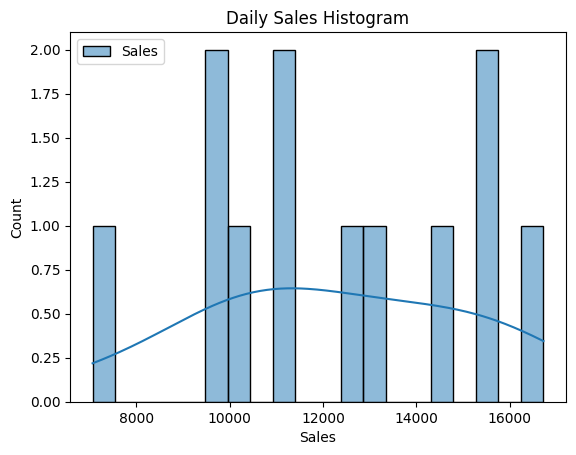

In [35]:
sns.histplot(df["Sales"], label="Sales", bins=20, kde=True)
plt.title("Daily Sales Histogram")
plt.legend()
plt.show()

In [36]:
df.skew(numeric_only=True)

Sales   -0.077344
dtype: float64

Skewness measures the asymmetry of the distribution of data values.

#### Positive Skewness (Right Skewed):
Indicates that the tail on the right side is longer or fatter than the left side. The mean is greater than the median.
#### Negative Skewness (Left Skewed):
Indicates that the tail on the left side is longer or fatter than the right side. The mean is less than the median.
#### Zero Skewness:
Indicates a symmetric distribution where the mean and median are approximately equal.

#### Output Interpretation:
The skewness of -0.077344 for Sales is close to zero.


#### Conclusion: The distribution of Daily Sales is nearly symmetric, meaning the data is fairly evenly distributed around the mean with no significant skewness.

<Axes: xlabel='Sales', ylabel='Density'>

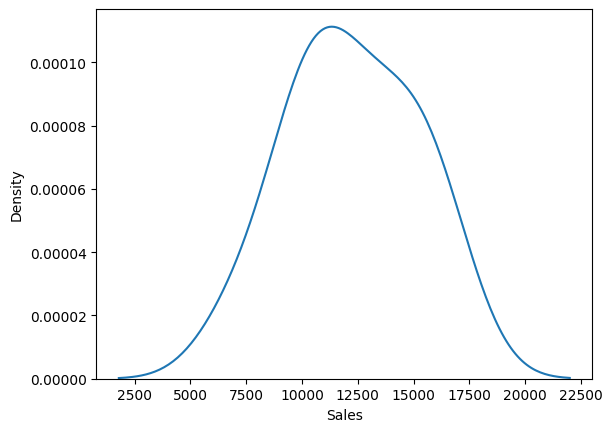

In [38]:
sns.kdeplot(df["Sales"])

**Conclusion:** Here, we can observe that the sales between range 10,000-12,500 is much more frequent or dense.

### Problem 3: Outlier detection
A university wants to analyze the exam scores of a statistics class to identify any students whose scores are significantly different from the rest. Detecting outliers will help the university provide additional support to struggling students or recognize exceptionally high performers. The university decides to use both the Z-score and the Interquartile Range (IQR) methods to identify these outliers in the exam scores dataset. 
- Generate the subject score for full mark 100 for 50 students.

Hints:
- Z-score is greater than 3.
- below - Q1−1.5×IQR or above Q3+1.5×IQR

In [41]:
# df = pd.DataFrame(
#     np.random.randint(0, 100, size=50),
#     axis=0,
#     columns=["marks"])
# df

df = pd.DataFrame([1, 99, 98, 100, 97, 99, 98, 97, 95], columns=["marks"], dtype=int)

In [42]:
print(z_scores := (df - df.mean()) / df.std(ddof=0))

      marks
0 -2.825571
1  0.390111
2  0.357298
3  0.422924
4  0.324485
5  0.390111
6  0.357298
7  0.324485
8  0.258859


In [43]:
for z in z_scores["marks"]:
    if abs(z) > 3:
        print(z)

In the above list, as per the above code, there are no students who are significantly different from the others. Maybe, we could differ them by compairing their z-scores against 2, instead of 3.

### IQR method

In [47]:
qs = df.quantile(q=[0.25, 0.75])
q1, q3 = qs["marks"].astype(int).to_list()
q1, q3

(97, 99)

In [48]:
iqr = (q3-q1)

In [49]:
lb = q1-1.5*iqr
rb = q3+1.5*iqr
lb, rb

(94.0, 102.0)

In [105]:
for mark in df["marks"]:
    if mark < lb:
        print(mark)
    elif mark > rb:
        print(mark)

1


In [57]:
df["marks"].apply(lambda mark: mark if (mark < lb) or (mark > rb) else None)

0    1.0
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
Name: marks, dtype: float64

In [61]:
outlied_stds = df["marks"].apply(lambda mark: mark if (mark < lb) or (mark > rb) else None).dropna()
outlied_stds

0    1.0
Name: marks, dtype: float64

In [ ]:
Hence, the student with mark 1 is an outlier.

In [62]:
# For syntax testing
mf = lambda mark: mark if (mark < lb) or (mark > rb) else None
mf(10), mf(98)

(10, None)

### Problem 4: t-test for ML models
Your task is to write Python code to perform t-tests on the testing results of five different machine learning algorithms. First, generate testing results for each of the five models, with each model having results for 50 test sets. Then, using these generated results, conduct t-tests to compare the results of the first model with those of each of the remaining four models. The goal is to determine if there is a statistically significant difference between the performance of the first model and each of the other models. Finally, print the results of each t-test, which will include the t-statistic and p-value for each comparison. And analyze the result whether the methods are statistically significant or not. What does it mean?

In [105]:
from scipy.stats import ttest_ind

Generating mock data for ML Algorithm results

In [106]:
np.random.seed(42)
model_1_results = np.random.normal(loc=0.75, scale=0.05, size=50)
model_2_results = np.random.normal(loc=0.74, scale=0.05, size=50)
model_3_results = np.random.normal(loc=0.76, scale=0.05, size=50)
model_4_results = np.random.normal(loc=0.73, scale=0.05, size=50)
model_5_results = np.random.normal(loc=0.77, scale=0.05, size=50)

Performing t-tests comparing Model 1 with each of the other models

In [107]:
t_stat_2, p_value_2 = ttest_ind(model_1_results, model_2_results)
t_stat_3, p_value_3 = ttest_ind(model_1_results, model_3_results)
t_stat_4, p_value_4 = ttest_ind(model_1_results, model_4_results)
t_stat_5, p_value_5 = ttest_ind(model_1_results, model_5_results)

Printing t-test results

In [109]:
print(f"Comparison of Model 1 and Model 2: t-statistic = {t_stat_2}, p-value = {p_value_2}")
print(f"Comparison of Model 1 and Model 3: t-statistic = {t_stat_3}, p-value = {p_value_3}")
print(f"Comparison of Model 1 and Model 4: t-statistic = {t_stat_4}, p-value = {p_value_4}")
print(f"Comparison of Model 1 and Model 5: t-statistic = {t_stat_5}, p-value = {p_value_5}")

Comparison of Model 1 and Model 2: t-statistic = -0.23911307109134353, p-value = 0.8115172551026837
Comparison of Model 1 and Model 3: t-statistic = -1.979634858202437, p-value = 0.05054962331937288
Comparison of Model 1 and Model 4: t-statistic = 0.49583340075139476, p-value = 0.6211221050921307
Comparison of Model 1 and Model 5: t-statistic = -3.821489672793791, p-value = 0.00023297364957086474


**Comparison of Model 1 and Model 2:**

t-statistic: -0.2391, p-value: 0.8115

Conclusion: Not statistically significant (p > 0.05). This means there is no significant difference in performance between Model 1 and Model 2.


**Comparison of Model 1 and Model 3:**

t-statistic: -1.9796, p-value: 0.0505

Conclusion: Borderline statistically significant (p ≈ 0.05). This suggests there might be a slight difference in performance between Model 1 and Model 3, but it is not strong enough to conclusively state a significant difference.


**Comparison of Model 1 and Model 4:**

t-statistic: 0.4958, p-value: 0.6211

Conclusion: Not statistically significant (p > 0.05). This means there is no significant difference in performance between Model 1 and Model 4.


**Comparison of Model 1 and Model 5:**

t-statistic: -3.8215, p-value: 0.0002

Conclusion: Statistically significant (p < 0.05). This indicates a significant difference in performance between Model 1 and Model 5.

**What is Statistically Significant?**
When the p-value is less than 0.05, it suggests that the observed differences in performance between the models are unlikely to have occurred by chance. Therefore, there is a significant difference between the compared models' performances.

- Model 1 vs Model 5: The significant difference implies that the performance of Model 1 is different from Model 5, and this difference is not due to random variation in the data.

**What is not Statistically Significant?**
When the p-value is greater than 0.05, it suggests that any observed differences are likely due to random variation, and there is no strong evidence to conclude that the models perform differently.

- Model 1 vs Model 2, Model 3, and Model 4: The lack of significant difference means that the performances of these models are statistically similar to Model 1.

### Problem 5: Correlation Analysis
- A coffee shop owner wants to determine whether there is a relationship between the amount of coffee sold and the temperature outside. The owner collects data on the number of cups of coffee sold and the temperature outside for 20 days.
- Download mtcars.csv file and perform the correlation analysis. See the result and analyze it. Also plot the heatmap for it.

In [87]:
df = pd.DataFrame(
    {
#         "temperature": np.random.randint(20, 40, size=30),
#         "cups": np.random.randint(200, 800, size=30)
        "temperature": [38, 37, 36, 35, 33, 29, 28, 26, 25, 22, 21, 20],
        "cups": [55, 56, 60, 65, 70, 65, 73, 73, 75, 75, 76, 78]
    }
)
df.head()

,temperature,cups
0,38,55
1,37,56
2,36,60
3,35,65
4,33,70


In [88]:
df.corr()

,temperature,cups
temperature,1.000000,-0.923896
cups,-0.923896,1.000000


<Axes: >

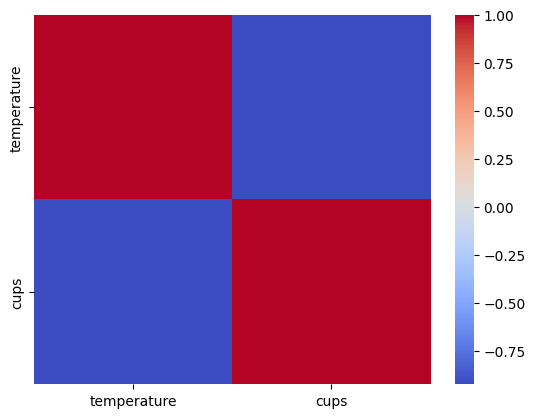

In [90]:
sns.heatmap(df.corr(), cmap="coolwarm")

**Conclusion: Correlation is just a mathematical relation, and it doesn\'t show the exact relation as it doesn\'t count for causality and effect.**

But still, in the above situation, we can conclude that number of cups decreases as the temperature increases or viceversa.

### Correlation analysis for mtcars.csv

In [92]:
df = pd.read_csv("../csv-files/mtcars.csv")

In [94]:
df.shape

(32, 12)

In [95]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [97]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [99]:
df.corr(numeric_only=True)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


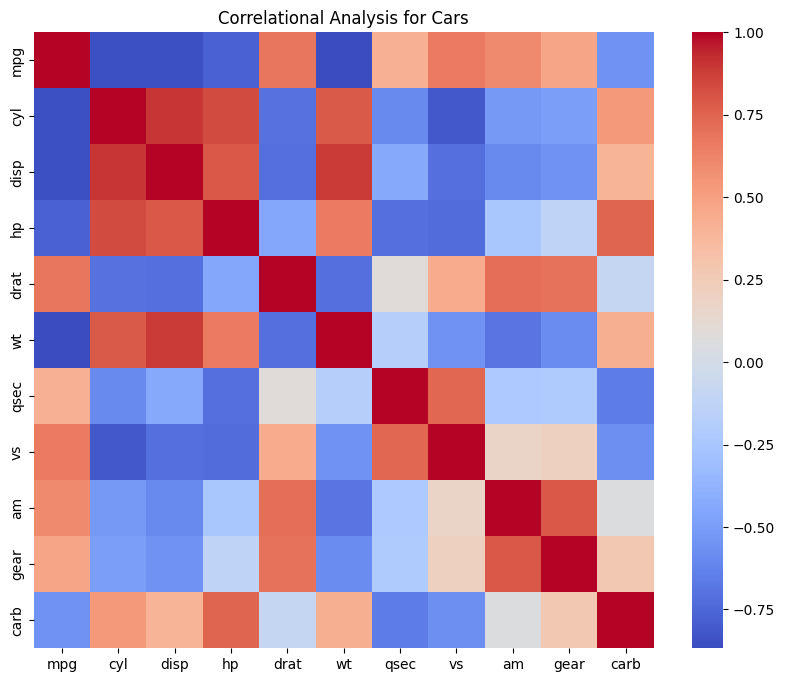

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlational Analysis for Cars")
# plt.legend()
plt.show()

**Analysis**

- mpg: Strong negative correlation with cyl, disp, hp, wt. Positive correlation with drat, vs, am.
- cyl: Strong positive correlation with disp, hp, wt. Negative correlation with mpg, vs.
- disp: Positive correlation with cyl, hp, wt. Negative correlation with mpg, vs.
- hp: Positive correlation with cyl, disp, carb. Negative correlation with mpg, vs, qsec.
- drat: Positive correlation with mpg, am, gear. Negative correlation with wt.
- wt: Positive correlation with cyl, disp. Negative correlation with mpg, qsec.
- qsec: Positive correlation with vs. Negative correlation with hp, carb.
- vs: Positive correlation with mpg, qsec. Negative correlation with cyl, hp, carb.
- am: Positive correlation with gear, drat. Negative correlation with wt.
- gear: Positive correlation with am, drat. Negative correlation with wt.
- carb: Positive correlation with hp, wt. Negative correlation with mpg, vs.

With the above analysis, we can continue using only some of the features by ignoring others, as they would have less impact on the ML process.

**Example**
Given the strong correlation between mpg (fuel efficiency) and features like cyl, disp, hp, and wt, we can simplify our model by selecting only these features and ignoring less correlated ones like qsec, vs, carb.

Selected Features:
cyl, disp, hp, wt

Ignored Features:
qsec, vs, carb

By focusing on cyl, disp, hp, and wt, which have strong correlations with mpg, we can build a more efficient ML model without significantly losing predictive power.

### Problem 6: Hypothesis testing
Imagine a company, samsung, that manufactures a popular smartphone. They have introduced a new battery designed to last longer than the previous model, which had an average battery life of 10 hours. To determine if the new battery indeed lasts longer, samsung conducts a study where they test 30 smartphones with the new battery and record their battery life. The goal is to test the hypothesis that the mean battery life of the new batteries is greater than 10 hours using a one-tailed test.

Hypothesis:
- Null Hypothesis (H₀): The mean battery life of the new battery is 10 hours.
- Alternative Hypothesis (H₁): The mean battery life of the new battery is greater than 10 hours.

1. Generate Mock Data:

Assuming a normal distribution for battery life with a mean slightly higher than 10 hours (10.5 hours) and a standard deviation (0.5 hours).

In [110]:
np.random.seed(42)
battery_life = np.random.normal(loc=10.5, scale=0.5, size=30)

2. Perform One-Tailed T-Test:

Usin `scipy.stats.ttest_1samp` to conduct a one-sample t-test by compare the mean battery life of the sample to the hypothesized mean (10 hours).

In [113]:
from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(battery_life, 10)
t_stat, p_value

(4.940745365634535, 2.990785594306498e-05)

In [114]:
# Since it's a one-tailed test, dividing the p-value by 2
p_value_one_tailed = p_value / 2
p_value_one_tailed

1.495392797153249e-05

In [115]:
print(f"t-statistic: {t_stat}, p-value (one-tailed): {p_value_one_tailed}")

t-statistic: 4.940745365634535, p-value (one-tailed): 1.495392797153249e-05


**Interpretation:**

The p-value is much smaller than the common significance level of 0.05.

**Conclusion:**

- Since the p-value is significantly less than 0.05, we reject the null hypothesis.
- This means there is strong statistical evidence that the mean battery life of the new Samsung battery is greater than 10 hours.

## Summarizing categorical variables

1. Frequency table
	1. Value count of blood type
	2. Value count of gender
	3. Value count as proportions
2. Contengency table
	1. Cross table of bloodtype and gender
	2. explore margins

### Frequency Table
Let's create a frequency table for blood type and gender.

In [118]:
data = {
    'Blood_Type': ['A', 'B', 'A', 'O', 'AB', 'A', 'B', 'O', 'A', 'B'],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M']
}
df = pd.DataFrame(data)

**Value Counts**

In [119]:
blood_type_counts = df['Blood_Type'].value_counts()
print("Blood Type Counts:")
print(blood_type_counts)

gender_counts = df['Gender'].value_counts()
print("\nGender Counts:")
print(gender_counts)

Blood Type Counts:
Blood_Type
A     4
B     3
O     2
AB    1
Name: count, dtype: int64

Gender Counts:
Gender
M    5
F    5
Name: count, dtype: int64


**Value count as proportions**

In [120]:
blood_type_proportions = df['Blood_Type'].value_counts(normalize=True)
print("\nBlood Type Proportions:")
print(blood_type_proportions)

gender_proportions = df['Gender'].value_counts(normalize=True)
print("\nGender Proportions:")
print(gender_proportions)



Blood Type Proportions:
Blood_Type
A     0.4
B     0.3
O     0.2
AB    0.1
Name: proportion, dtype: float64

Gender Proportions:
Gender
M    0.5
F    0.5
Name: proportion, dtype: float64


### Contingency Table
Let's create a contingency table for blood type and gender.

In [121]:
contingency_table = pd.crosstab(df['Blood_Type'], df['Gender'])
print("\nContingency Table:")
print(contingency_table)


Contingency Table:
Gender      F  M
Blood_Type      
A           3  1
AB          0  1
B           2  1
O           0  2


In [122]:

contingency_table_with_margins = pd.crosstab(df['Blood_Type'], df['Gender'], margins=True)
print("\nContingency Table with Margins:")
print(contingency_table_with_margins)


Contingency Table with Margins:
Gender      F  M  All
Blood_Type           
A           3  1    4
AB          0  1    1
B           2  1    3
O           0  2    2
All         5  5   10


We can see that there is clear distribution of blood types and gender, with equal gender proportions.

## Interval Estimation of the Proportion

```
HINT: explore st.norm.interval
```

1.  There are two candidates for the election: A and B.
The candidate A wants to survey his approval rating.
Out of 100 suerveyed, 55 answered positively.
Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.

2. Out of 1000 suerveyed, 550 answered positively. Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.


In [126]:
import scipy.stats as st

Helper function to calculate confidence interval

In [128]:
def proportion_confidence_interval(successes, n, confidence_level=0.95):
    proportion = successes / n
    z = st.norm.ppf(1 - (1 - confidence_level) / 2)
    se = (proportion * (1 - proportion) / n) ** 0.5
    margin_of_error = z * se
    return (proportion - margin_of_error, proportion + margin_of_error)

1. First scenario

In [129]:
n1, successes1 = 100, 55
ci1 = proportion_confidence_interval(successes1, n1)
print(f"\n95% Confidence Interval for 55 out of 100: {ci1}")


95% Confidence Interval for 55 out of 100: (0.45249302291006066, 0.6475069770899394)


2. Second scenario

In [130]:
n2, successes2 = 1000, 550
ci2 = proportion_confidence_interval(successes2, n2)
print(f"\n95% Confidence Interval for 550 out of 1000: {ci2}")


95% Confidence Interval for 550 out of 1000: (0.5191655864637935, 0.5808344135362066)


**Conclusion:**
     Candidate A has more than 50% approval in both scenarios based on confidence intervals.

### How can we know that the three groups are same or different?

- There are three groups of students. The data corresponds to the test scores. Determine whether there is any significant difference in the group test scores.
```python
# Data
x1 = np.array([82,93,61,74,69,70,53])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87])
```


**We can compare three groups using ANOVA**
First, let's determine whether there is any significant difference in the test scores of three groups using ANOVA.

In [123]:
from scipy.stats import f_oneway

Creating some mock data

In [124]:
x1 = np.array([82, 93, 61, 74, 69, 70, 53])
x2 = np.array([71, 62, 85, 94, 78, 66, 71])
x3 = np.array([64, 73, 87, 91, 56, 78, 87])

Performing ANOVA

In [125]:
f_stat, p_value = f_oneway(x1, x2, x3)
print(f"\nANOVA F-statistic: {f_stat}, p-value: {p_value}")


ANOVA F-statistic: 0.2837261275904103, p-value: 0.7562784116739912


**Conclusion**
The p-value is greater than 0.05, indicating no significant difference between the three groups' test scores.